<a href="https://colab.research.google.com/github/alfi-98/imageProcessing/blob/main/imageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt

In [ ]:
I = io.imread("test1.jpg")

print(I.shape)

(797, 1614, 3)


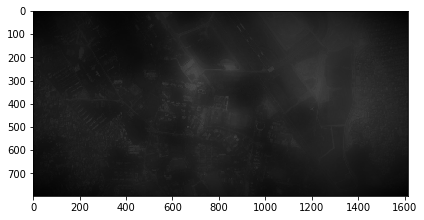

In [ ]:
io.imshow(I)

In [ ]:
hist, bins_hist = exposure.histogram(I.ravel(), nbins = 255, normalize = True)
cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins = 255)

Text(0, 0.5, 'percentage')

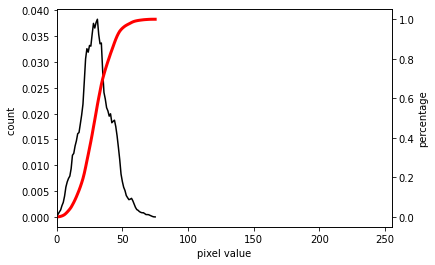

In [ ]:
plt.rcParams['figure.figsize'] = (6,4)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("pixel value")
plt.ylabel("count ")
plt.xlim([0, 255])

plt.twinx()
plt.plot(bins_cdf, cdf, 'r', lw = 3)
plt.ylabel("percentage")

In [ ]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
  hist, bins_hist = exposure.histogram(I.ravel(), nbins = nbins, normalize = normalize)
  plt.plot(bins_hist, hist, 'k')
  plt.xlabel("pixel value")
  if normalize:
      plt.ylabel("probability ")
  else:
    plt.ylabel("count")
  xmax = 1 if I.max() <= 1 else 255
  plt.xlim([0, xmax])

  if plot_cdf:
      cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins = 255)
      plt.twinx()
  plt.plot(bins_cdf, cdf, 'r', lw = 3)
  plt.ylabel("percentage")


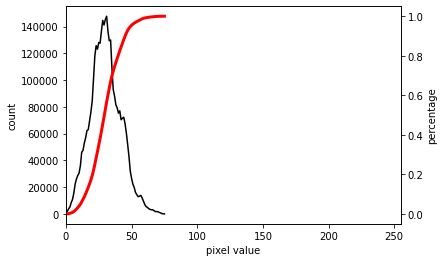

In [ ]:
plot_hist(I)
plt.show()

In [ ]:
I = io.imread("test1.jpg")
I = I / 255
print(I.shape)

(797, 1614, 3)


In [ ]:
Ieq = exposure.equalize_hist


In [ ]:
Ieq = exposure.equalize_hist(I)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Text(0.5, 1.0, 'normal')

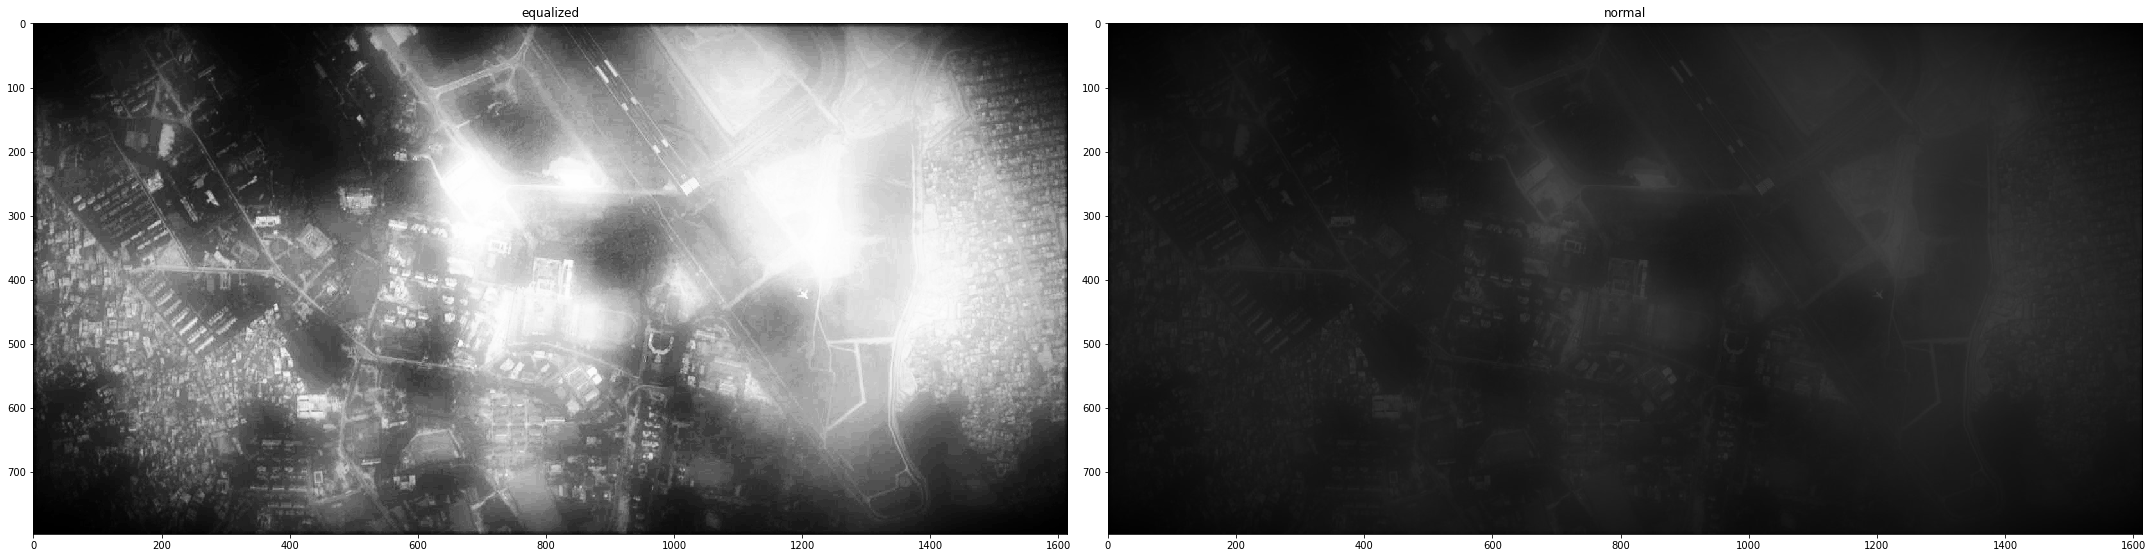

In [ ]:
plt.rcParams['figure.figsize'] = (30,30)
plt.subplot(1,2,1)
io.imshow(Ieq)
plt.title("equalized")

plt.subplot(1,2,2)
io.imshow(I)
plt.title("normal")

In [ ]:
I = io.imread("test1.jpg")
I = I / 255


In [ ]:
I_adapt_eq_normal = exposure.equalize_adapthist(Ieq, kernel_size = (36, 36), clip_limit=0)
I_adapt_eq = exposure.equalize_adapthist(I, kernel_size = (36, 36), clip_limit=0)

Text(0.5, 1.0, 'AHE')

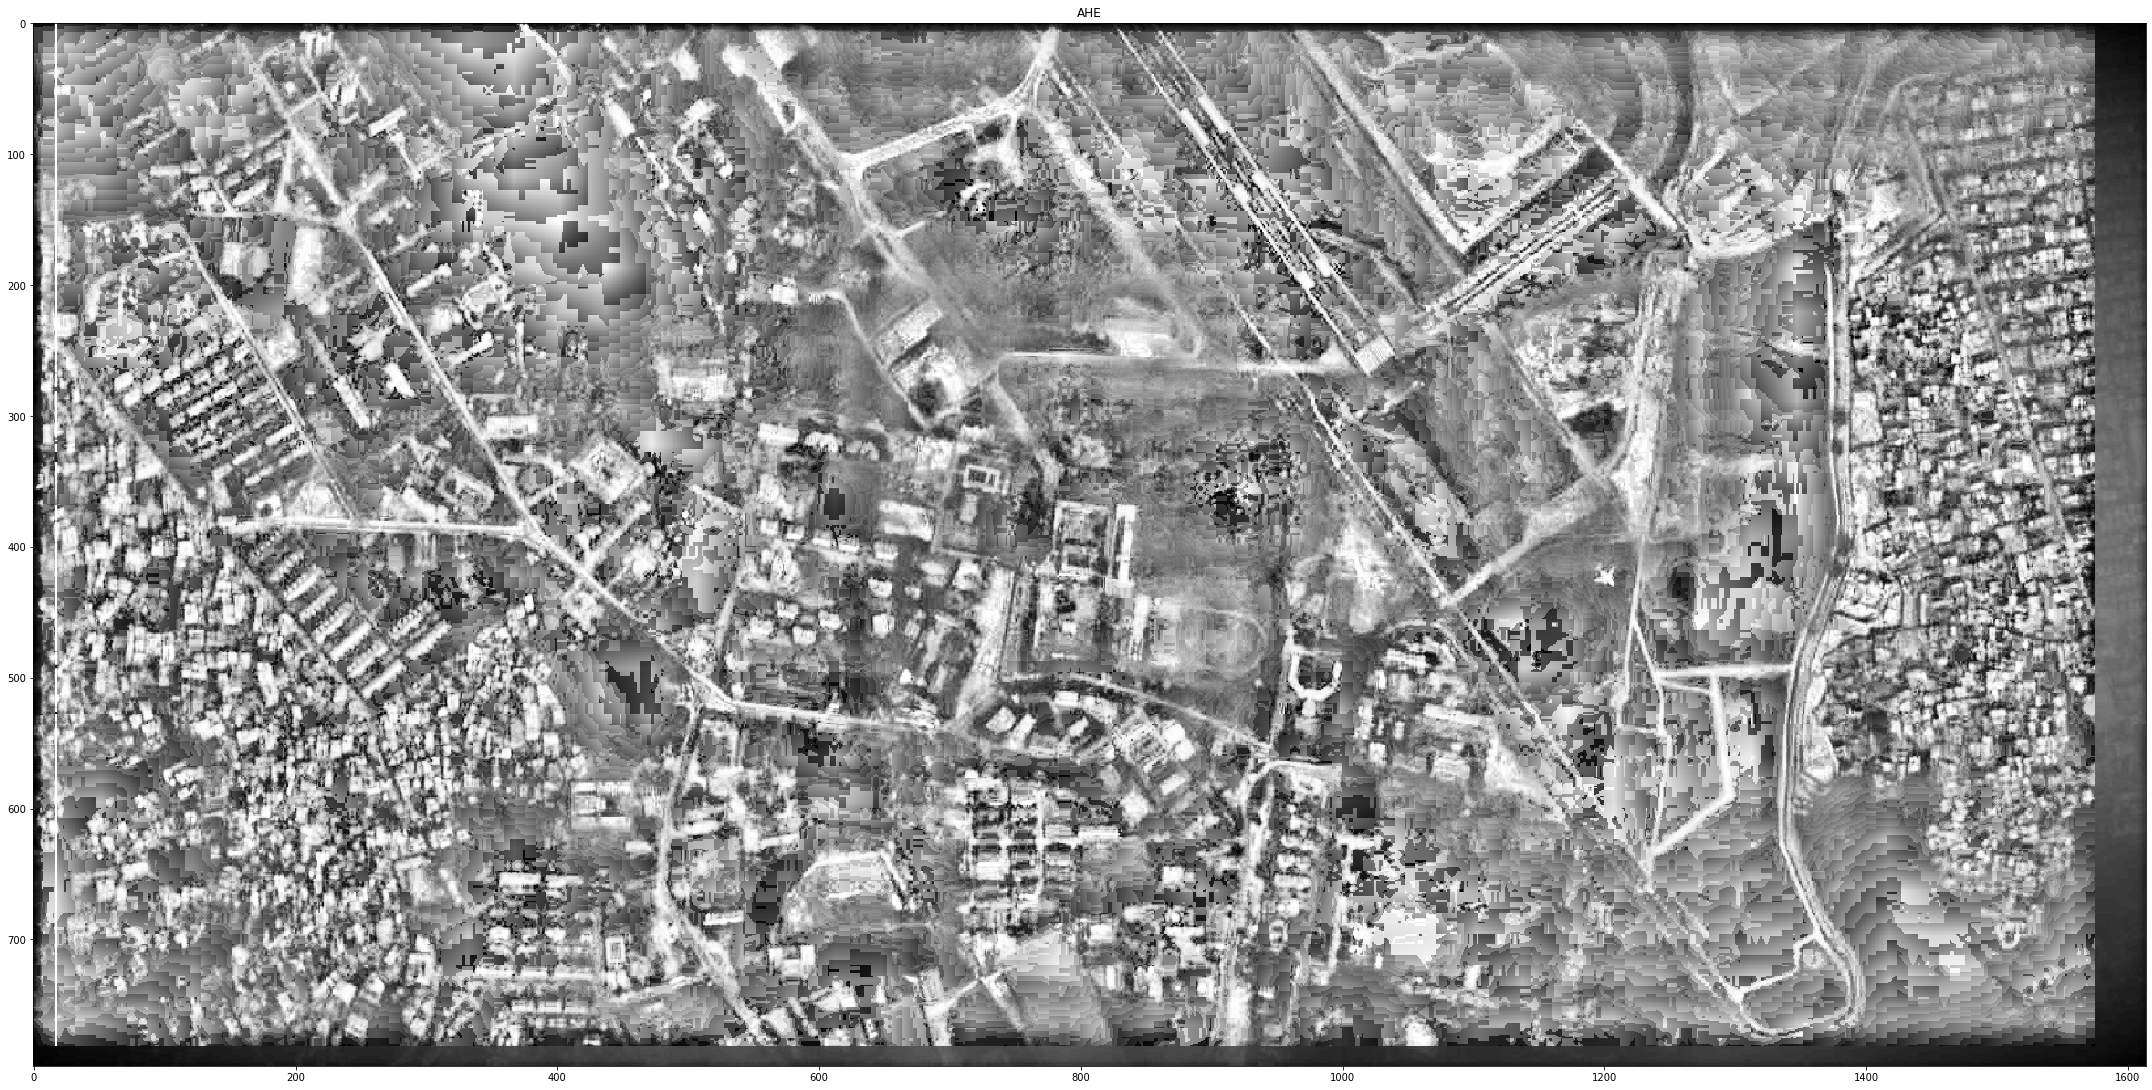

In [ ]:
io.imshow(I_adapt_eq)
plt.title("AHE")

In [ ]:
I = io.imread("test1.jpg")
I = I / 255


In [ ]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size = (100, 100), clip_limit=0.01)

Text(0.5, 1.0, 'CLAHE')

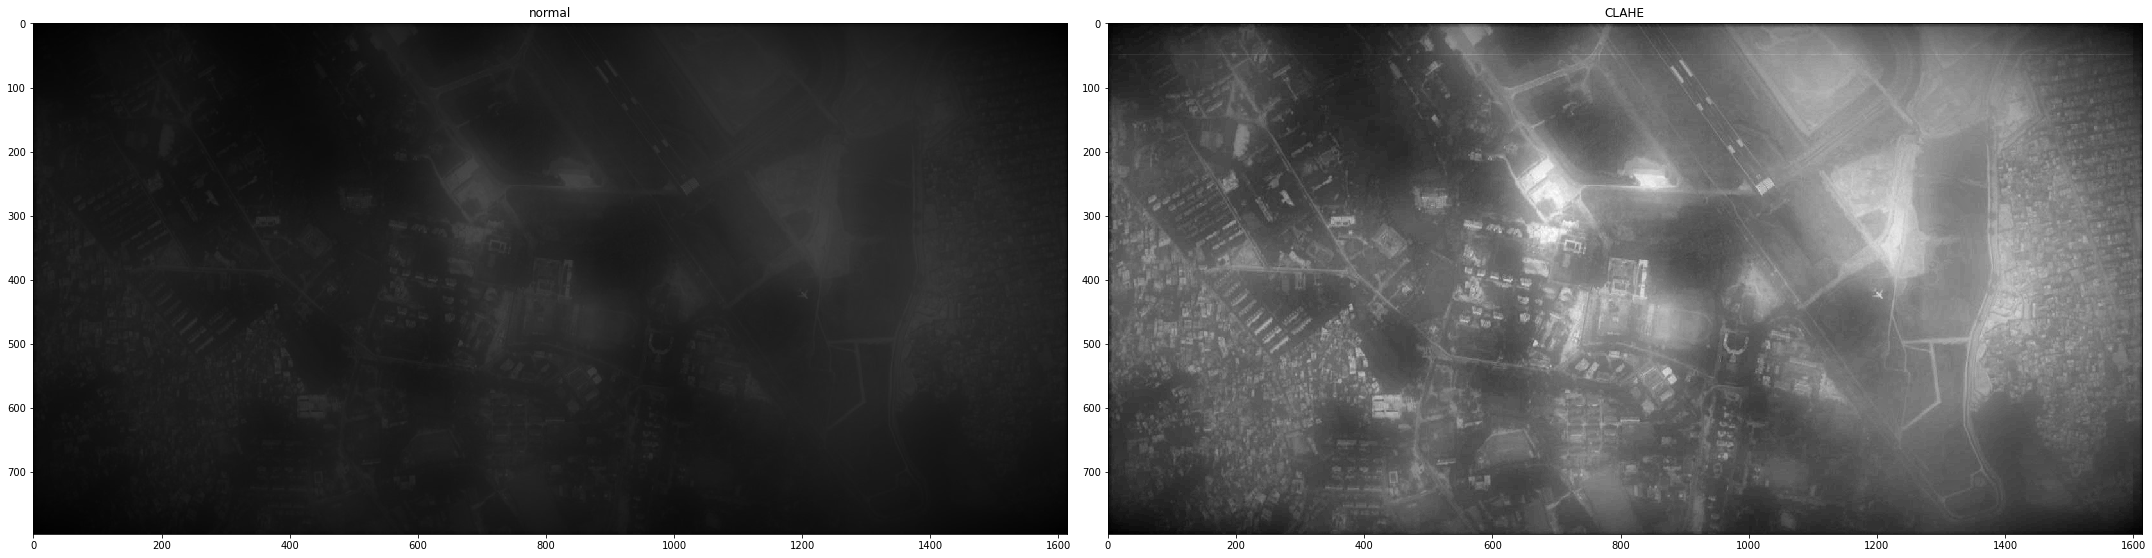

In [ ]:
plt.rcParams['figure.figsize'] = (30,30)
plt.subplot(1,2,1)
io.imshow(I)
plt.title("normal")

plt.subplot(1,2,2)
io.imshow(I_CLAHE)
plt.title("CLAHE")